In [1]:
import numpy
import pandas
import seaborn
from scipy import stats
import matplotlib

# upload data

xlsx_path = 'vpc_dstest_2021.xlsx'
#xlsx_path = 'https://docs.google.com/spreadsheets/d/1QbhtLwRbjcGtGPG9Th0ZbG3D_zIzZGBy/edit#gid=1096624214'
df = pandas.read_excel(xlsx_path, sheet_name=2)

# Print the header to make sure the spreadsheet loaded correctly

df.head()

,RESPONSE,age,child,education,gun_owner,ideology,income_bin,partisanship,voteprop2018,household_partisanship,...,earliestregistrationdate,ethnicity,gender,mailaddrcity,mailaddrstate,mailaddrzip,mailaddrdpvconfirm,race,religion,voterstatus
0,0,38.0,38.8,58,21,83.6,"$75,000 - $100,000",93,3.5,D,...,2005-05-13 00:00:00,Western European,female,PHOENIX,AZ,85086,Y,caucasian,Uncoded,dropped
1,0,38.0,44.2,76,25,64.0,"$75,000 - $100,000",78,NaN,U,...,1998-10-19 00:00:00,Western European,female,TUCSON,AZ,85750,Y,caucasian,Uncoded,dropped
2,1,50.0,15.5,44,76,77.0,"$50,000 - $75,000",43,80.4,R,...,2002-05-20 00:00:00,Western European,male,FLAGSTAFF,AZ,86005,S,black,Uncoded,dropped
3,0,35.0,26.6,75,32,94.3,"$30,000 - $50,000",98,NaN,D,...,2002-09-15 00:00:00,Western European,female,FLAGSTAFF,AZ,86005,Y,caucasian,Uncoded,dropped
4,0,55.0,6.4,39,48,75.0,"$100,000 - $150,000",86,NaN,O,...,NaN,Western European,female,FLAGSTAFF,AZ,86005,Y,caucasian,Uncoded,unregistered


In [2]:
# Check to make sure each column has the correct datatype

df.dtypes

RESPONSE                      int64
age                         float64
child                       float64
education                     int64
gun_owner                     int64
ideology                    float64
income_bin                   object
partisanship                  int64
voteprop2018                float64
household_partisanship       object
married                      object
partisanship.1               object
changeofaddressdate          object
congressionaldistrict       float64
countyfips                  float64
earliestregistrationdate     object
ethnicity                    object
gender                       object
mailaddrcity                 object
mailaddrstate                object
mailaddrzip                   int64
mailaddrdpvconfirm           object
race                         object
religion                     object
voterstatus                  object
dtype: object

In [3]:
# Convert education, gun_owner, and partisanship to float

for word in ['education', 'gun_owner', 'partisanship']:
    df[word] = df[word].astype('float')

# Convert identification numbers from int to object types

for word in ['mailaddrzip', 'congressionaldistrict', 'countyfips']:
    df[word] = df[word].astype('object')
    # Print out results to keep track of number of categorical variables that are being added to the data
    print(word + ':' + str(len(df[word].unique())) + ' unique values')

# Convert dates into datetime format

for word in ['changeofaddressdate', 'earliestregistrationdate']:
    df[word] = [pandas.to_datetime(x, errors='coerce') for x in df[word]]

# Check results

df.dtypes

mailaddrzip:1428 unique values
congressionaldistrict:17 unique values
countyfips:90 unique values


RESPONSE                             int64
age                                float64
child                              float64
education                          float64
gun_owner                          float64
ideology                           float64
income_bin                          object
partisanship                       float64
voteprop2018                       float64
household_partisanship              object
married                             object
partisanship.1                      object
changeofaddressdate         datetime64[ns]
congressionaldistrict               object
countyfips                          object
earliestregistrationdate    datetime64[ns]
ethnicity                           object
gender                              object
mailaddrcity                        object
mailaddrstate                       object
mailaddrzip                         object
mailaddrdpvconfirm                  object
race                                object
religion   

In [4]:
# Get total number of categorical variables

count = 0

for key in ['household_partisanship', 'married', 'congressionaldistrict', 'ethnicity', 'gender', 'mailaddrcity', 'mailaddrstate', 'mailaddrdpvconfirm', 'mailaddrzip', 'countyfips', 'race', 'religion', 'voterstatus']:
    print(key + ': ' + str(len(df[key].unique())) + ' unique values')
    count = count + len(df[key].unique())

print('\nTotal categorical variables: ' + str(count) + ' unique values')

# Print out the basic statistical information

df.describe()

household_partisanship: 7 unique values
married: 2 unique values
congressionaldistrict: 17 unique values
ethnicity: 33 unique values
gender: 3 unique values
mailaddrcity: 1055 unique values
mailaddrstate: 5 unique values
mailaddrdpvconfirm: 3 unique values
mailaddrzip: 1428 unique values
countyfips: 90 unique values
race: 6 unique values
religion: 8 unique values
voterstatus: 2 unique values

Total categorical variables: 2659 unique values


,RESPONSE,age,child,education,gun_owner,ideology,partisanship,voteprop2018
count,28916.000000,25242.000000,28916.000000,28916.000000,28916.000000,28916.000000,28916.000000,682.000000
mean,0.012657,56.535298,19.358639,18.613501,41.715936,58.253884,69.640407,28.930601
std,0.111793,15.379054,21.677718,15.324808,22.171275,10.675587,18.367672,33.110540
min,0.000000,18.000000,0.500000,0.000000,1.000000,5.300000,2.000000,0.000000
25%,0.000000,48.000000,4.400000,8.000000,24.000000,51.100000,57.000000,2.600000
50%,0.000000,59.000000,9.400000,14.000000,39.000000,57.100000,71.000000,10.330000
75%,0.000000,67.000000,26.700000,25.000000,59.000000,64.400000,85.000000,55.525000
max,1.000000,88.000000,98.700000,97.000000,99.000000,96.900000,100.000000,99.500000


In [5]:
# Change select column names to something more intuitive (and remove redundancies)

df.columns = ['RESPONSE', 'age', 'child', 'education', 'gun', 'ideology', 'income_bin', 'partisanship', 'voteprop2018', 'household_party', 'marital_status', 'party', 'address_date', 'district', 'fips', 'registration_date', 'ethnicity', 'gender', 'city', 'state', 'zip', 'confirmed', 'race', 'religion', 'status']

# In preparation for converting categorical variables, make sure all object columns have a unique value relative to other columns

df['household_party'] = df['household_party'] + '_house'
df['party'] = df['party'] + '_ind'
df['marital_status'] = df['marital_status'].replace('S', 'Single').replace('M', 'Married')
for word in ['ethnicity', 'religion']:
    df[word] = df[word].replace('Uncoded', 'Uncoded_' + word)

df.head()

,RESPONSE,age,child,education,gun,ideology,income_bin,partisanship,voteprop2018,household_party,...,registration_date,ethnicity,gender,city,state,zip,confirmed,race,religion,status
0,0,38.0,38.8,58.0,21.0,83.6,"$75,000 - $100,000",93.0,3.5,D _house,...,2005-05-13,Western European,female,PHOENIX,AZ,85086,Y,caucasian,Uncoded_religion,dropped
1,0,38.0,44.2,76.0,25.0,64.0,"$75,000 - $100,000",78.0,NaN,U _house,...,1998-10-19,Western European,female,TUCSON,AZ,85750,Y,caucasian,Uncoded_religion,dropped
2,1,50.0,15.5,44.0,76.0,77.0,"$50,000 - $75,000",43.0,80.4,R _house,...,2002-05-20,Western European,male,FLAGSTAFF,AZ,86005,S,black,Uncoded_religion,dropped
3,0,35.0,26.6,75.0,32.0,94.3,"$30,000 - $50,000",98.0,NaN,D _house,...,2002-09-15,Western European,female,FLAGSTAFF,AZ,86005,Y,caucasian,Uncoded_religion,dropped
4,0,55.0,6.4,39.0,48.0,75.0,"$100,000 - $150,000",86.0,NaN,O _house,...,NaT,Western European,female,FLAGSTAFF,AZ,86005,Y,caucasian,Uncoded_religion,unregistered


In [6]:
# For binning purposes, print out min and max of all quantitative variables

for word in ['age', 'child', 'education', 'gun', 'ideology', 'partisanship', 'voteprop2018', 'address_date', 'registration_date']:
    print(word, min(df[word]), max(df[word]))

# Bin all quantitative variables

def makebins(minimum, maximum, step, number, qualifier=''):
    if number < minimum:
        return qualifier + 'Under ' + str(minimum)
    elif number > maximum:
        return qualifier + 'Over ' + str(maximum)
    count = minimum
    while number > count:
        count = count + step
    return qualifier + str(count-step) + '-' + str(count)

def datebins(minimum, maximum, step, date, qualifier=''):
    if date.year < minimum:
        return qualifier + 'Before' + str(minimum)
    elif date.year > maximum:
        return qualifier + 'After' + str(maximum)
    count = minimum
    while date.year > count:
        count = count + step
    return qualifier + str(count-step) + '-' + str(count)

# Bin quantitative data

df['age_bin'] = [makebins(18, 88, 10, x, qualifier='Age ') for x in df['age']]
for word in ['child', 'education', 'gun', 'ideology', 'partisanship', 'voteprop2018']:
    df[word + '_bin'] = [makebins(0, 100, 10, x, qualifier=word + ' ') for x in df[word]]

# Bin dates

for word in ['address', 'registration']:
    df[word + '_bin'] = [datebins(1920, 2010, 10, x, qualifier = word + ' ') for x in df[word + '_date']]

df.head()

age 18.0 88.0
child 0.5 98.7
education 0.0 97.0
gun 1.0 99.0
ideology 5.3 96.9
partisanship 2.0 100.0
voteprop2018 0.0 99.5
address_date NaT NaT
registration_date 1918-01-01 00:00:00 2019-03-12 00:00:00


,RESPONSE,age,child,education,gun,ideology,income_bin,partisanship,voteprop2018,household_party,...,status,age_bin,child_bin,education_bin,gun_bin,ideology_bin,partisanship_bin,voteprop2018_bin,address_bin,registration_bin
0,0,38.0,38.8,58.0,21.0,83.6,"$75,000 - $100,000",93.0,3.5,D _house,...,dropped,Age 28-38,child 30-40,education 50-60,gun 20-30,ideology 80-90,partisanship 90-100,voteprop2018 0-10,address 1910-1920,registration 2000-2010
1,0,38.0,44.2,76.0,25.0,64.0,"$75,000 - $100,000",78.0,NaN,U _house,...,dropped,Age 28-38,child 40-50,education 70-80,gun 20-30,ideology 60-70,partisanship 70-80,voteprop2018 -10-0,address 1910-1920,registration 1990-2000
2,1,50.0,15.5,44.0,76.0,77.0,"$50,000 - $75,000",43.0,80.4,R _house,...,dropped,Age 48-58,child 10-20,education 40-50,gun 70-80,ideology 70-80,partisanship 40-50,voteprop2018 80-90,address 1910-1920,registration 2000-2010
3,0,35.0,26.6,75.0,32.0,94.3,"$30,000 - $50,000",98.0,NaN,D _house,...,dropped,Age 28-38,child 20-30,education 70-80,gun 30-40,ideology 90-100,partisanship 90-100,voteprop2018 -10-0,address 1910-1920,registration 2000-2010
4,0,55.0,6.4,39.0,48.0,75.0,"$100,000 - $150,000",86.0,NaN,O _house,...,unregistered,Age 48-58,child 0-10,education 30-40,gun 40-50,ideology 70-80,partisanship 80-90,voteprop2018 -10-0,address 1910-1920,registration 1910-1920


In [7]:
# Check relevance of all categorical variables

keys = ['income_bin', 'household_party', 'marital_status', 'party', 'district', 'fips', 'ethnicity', 'gender', 'city', 'state', 'zip', 'confirmed', 'race', 'religion', 'status', 'age_bin', 'child_bin', 'education_bin', 'gun_bin', 'ideology_bin', 'partisanship_bin', 'voteprop2018_bin', 'address_bin', 'registration_bin']

# Make histograms to check which variables are most relevant; uncomment to generate plots

#import matplotlib.pyplot as pyplot

#%matplotlib inline

#for key in keys:
#    pandas.crosstab(df[key], df.RESPONSE, normalize='index').plot(kind='bar')
#    pyplot.title('By ' + key.replace('_', ' '))
#    pyplot.xlabel(key.replace('_', ''))
#    pyplot.ylabel('Normalized Response')
#    pyplot.savefig(key + '_hist.png')

# Minimum standard deviation for considering a categorical variable significant

threshold = 0.01
sig_keys = []

# Quantitatively check which categorical variables have the most influence on the result

for key in keys:
    # Get all possible values for each categorical variable
    values = df[key].unique()
    arr = []
    for value in values:
        temp = df[df[key]==value]
        # Get ratio of response to total for each categorical variable
        if len(temp) > 0: arr.append(float(len(temp[temp['RESPONSE']==1]))/float(len(temp)))
    #print(key + ': mean ' + str(numpy.mean(arr)) + ', std ' + str(numpy.std(arr)))
    if numpy.std(arr) > threshold: sig_keys.append(key)

print(sig_keys)

['party', 'fips', 'ethnicity', 'city', 'zip', 'confirmed', 'race', 'ideology_bin', 'partisanship_bin', 'voteprop2018_bin']


In [8]:
# Check for obvious correlations to make sure the input variables are independent; uncomment to generate plots

#keys = ['age', 'child', 'education', 'gun', 'ideology', 'partisanship', 'voteprop2018']

#for i in range(len(keys)):
#    for j in range(len(keys)-i-1):
#        seaborn.regplot(x=keys[i], y=keys[j+i+1], data=df)
#        pyplot.xlabel(keys[i])
#        pyplot.ylabel(keys[j+i+1])
#        pyplot.show()

# Since ideology and partisanship are correlated, it's only necessary to keep one

sig_keys.remove('partisanship_bin')

# Likewise remove city, since city and zip are both a measure of location and zip is more precise

sig_keys.remove('city')

# Prepare to run model in both location aware and location naive modes

location_naive = [x for x in sig_keys if x!='zip']

print(location_naive)

all_zips = df['zip'].unique()

# Keep track of number of independent variables

var_count = 0

for key in sig_keys:
    var_count = var_count + len(df[key].unique())

# Make sure the number of independent variables is not too large relative to the number of data points

print(str(len(df)) + ' data points, ' + str(var_count) + ' independent variables')

['party', 'fips', 'ethnicity', 'confirmed', 'race', 'ideology_bin', 'voteprop2018_bin']
28916 data points, 1584 independent variables


In [28]:
# Make an array to store the response variable

Y = df['RESPONSE']

# Make an array of all the good predictor variables

# Create empty dataframe to store input data

X = pandas.DataFrame()

# Convert categorical variables into quantitative variables

for key in sig_keys:
    # Create a unique label for each variable
    if 'bin' in key:
        prefix = ''
    else:
        prefix = key.replace(' ', '_') + '_'
    temp = pandas.get_dummies(df[key], prefix=prefix)
    X = pandas.concat([X, temp], axis=1)
    
print(str(len(Y)) + ' data points, ' + str(len(X.columns)) + ' independent variables')
print(len([x for x in Y if x==1]))
print(len([x for x in Y if x==0]))

28916 data points, 1582 independent variables
366
28550


In [88]:
# Fit model to data

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Tried out multiple different algorithms to check empirically which one gave better results.
# The logistic regression model gave the best score.

model = LogisticRegression(max_iter=1000)
#model = DecisionTreeClassifier()

#k_values = [1, 2, 3, 4, 5, 6, 7]

#for k in k_values:
    # Define pipeline
    
#    over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
#    under = RandomUnderSampler(sampling_strategy=0.5)
#    steps = [('over', over), ('under', under), ('model', model)]
#    pipeline = Pipeline(steps=steps)
    # Evaluate pipeline

#    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#    scores = cross_val_score(pipeline, X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
#    print('k=' + str(k) + ' Mean ROC AUC: ' + str(numpy.mean(scores)))

# Define pipeline

over = SMOTE(sampling_strategy=0.1, k_neighbors=2)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

#Evaluate pipeline

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC ' + str(numpy.mean(scores)))

Mean ROC AUC 0.5383103593961739


In [89]:
# Use the pipeline to make a prediction

from sklearn.model_selection import train_test_split

# Split the data into training and testing data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

pipeline.fit(X_train, Y_train)
Yhat = pipeline.predict(X_test)

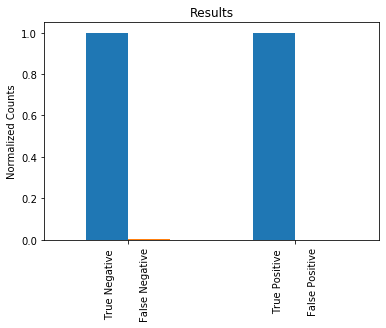

In [90]:
# Visualize the results

pandas.crosstab(Y_test, Yhat)

pandas.crosstab(Y_test, Yhat, normalize='index').plot(kind='bar', legend=False)
pyplot.title('Results')
pyplot.xlabel('')
pyplot.ylabel('Normalized Counts')
pyplot.xticks(numpy.arange(2), ['True Negative\n\n\nFalse Negative', 'True Positive\n\n\nFalse Positive'])
pyplot.show()